In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
data = pd.read_csv("C:\\Users\\stadn\\Desktop\\kaggle_ds\\ds_salaries.csv")

In [231]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [232]:
data["experience_level"].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

Im making those labels more readable.

In [233]:
data["experience_level"] = data["experience_level"].replace({"SE":"Senior", "MI":"Mid", "EN":"Entry", "EX":"Executive"})

In [234]:
data["employment_type"] = data["employment_type"].replace({"FT":"Full-time", "CT":"Contractual","PT":"Part-time", "FL":"Freelancer"})

Now im going to drop useless columns.

In [235]:
data = data.drop(["salary", "salary_currency"], axis=1)

Here im going to delete duplicated rows from dataset

In [236]:
data = data.drop_duplicates(keep="last")

In [237]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Mid,Contractual,ML Engineer,30000,US,100,US,S
2,2023,Mid,Contractual,ML Engineer,25500,US,100,US,S
3,2023,Senior,Full-time,Data Scientist,175000,CA,100,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,CA,100,CA,M


In [238]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Now i can start analysis.

<AxesSubplot:xlabel='experience_level', ylabel='count'>

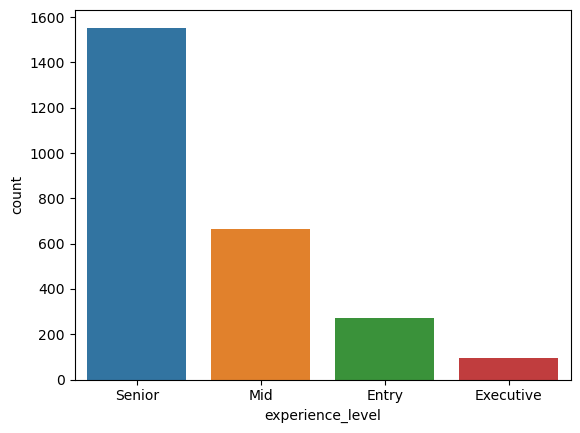

In [239]:
sns.countplot(x=data["experience_level"])

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

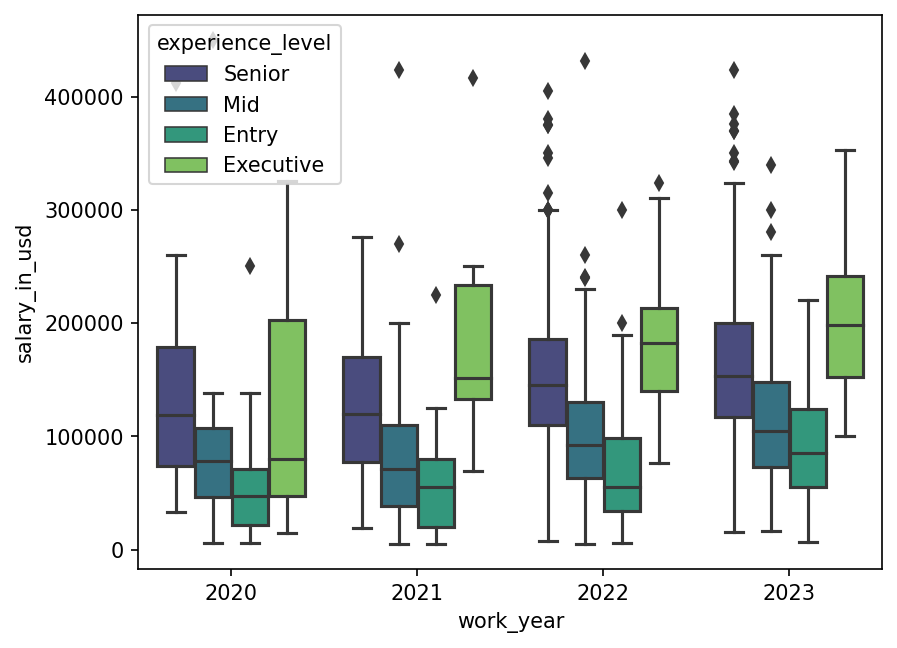

In [240]:
fig = plt.figure(dpi=150)
sns.boxplot(data=data, x="work_year", y="salary_in_usd", hue="experience_level", palette="viridis")

As we can see on the plot above, salaries have increased through the years. In 2022 and 2023 number of outliers also increased. It can be caused because of the fact, that in the last 2 years the world have been produced 90% of the data that exist, so there is greater need of data scientists and data analysts. I hope i will be one of them in future. 

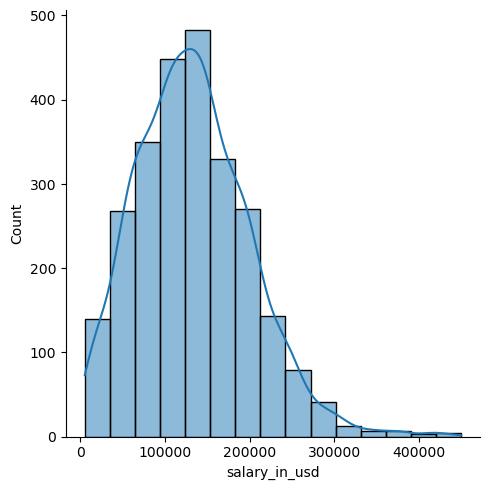

In [241]:
sns.displot(x=data["salary_in_usd"], kde=True, bins=15)

In [242]:
salary = data.groupby("job_title").agg({"salary_in_usd" : "mean"}).round(0).sort_values("salary_in_usd", ascending=False).reset_index("job_title")

In [243]:
salary = salary.head(10)

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

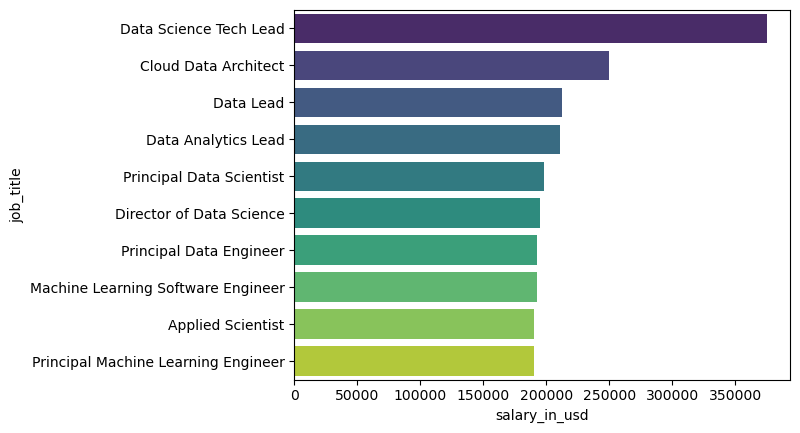

In [244]:
sns.barplot(data=salary, x="salary_in_usd", y="job_title", palette="viridis")

<Figure size 1280x960 with 0 Axes>

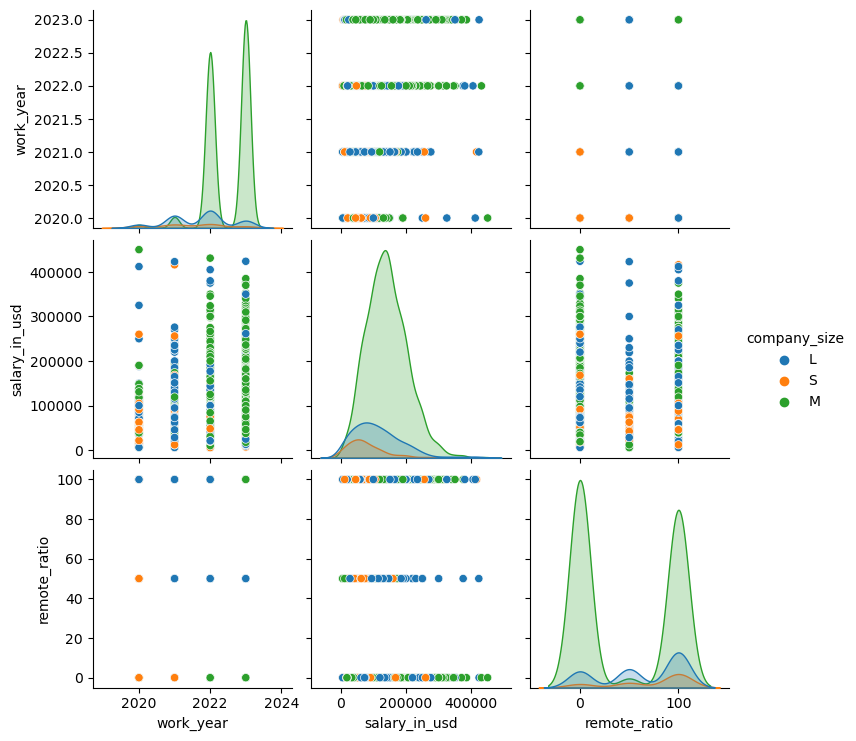

In [245]:
plt.figure(dpi=200)
sns.pairplot(data, hue="company_size")

Now im going to start the regression.

In [246]:
data = data.drop("remote_ratio", axis=1)

In [247]:
data = data.astype({"work_year" : str})

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   object
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   company_location    2584 non-null   object
 7   company_size        2584 non-null   object
dtypes: int64(1), object(7)
memory usage: 246.2+ KB


In [249]:
cat_data = data.select_dtypes(include="object")
num_data = data.select_dtypes(exclude="object")

In [250]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
cat_data = oe.fit_transform(cat_data)
cat_data = pd.DataFrame(cat_data)

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cat_data, num_data, test_size=0.2, random_state=42)

In [252]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.transform(y_test)

In [253]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [254]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))

In [255]:
rmse

59045.46943987227